In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the training and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
# Display the first few rows of the training dataset
print("Training Dataset:")
print(train_df.head())

# Display the first few rows of the test dataset
print("\nTest Dataset:")
print(test_df.head())

Training Dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  

In [5]:
# Data Cleaning

# Check for missing values in training dataset
print("\nMissing values in training dataset:")
print(train_df.isnull().sum())


Missing values in training dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Fill missing 'Age' with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

In [7]:
# Fill missing 'Embarked' with the mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Fill missing 'Fare' in test dataset with the median fare
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


In [9]:
# Drop 'Cabin' since it has too many missing values
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

In [10]:
# Convert 'Sex' to numerical values: 0 for Male, 1 for Female
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numerical values: 0 for S, 1 for C, 2 for Q
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [11]:
# Exploratory Data Analysis (EDA)

# Summary statistics
print("\nSummary statistics of training dataset:")
print(train_df.describe())



Summary statistics of training dataset:
       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    0.361392  
std      1.102743    0.806057   49.693429    0.635673  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400    0.0

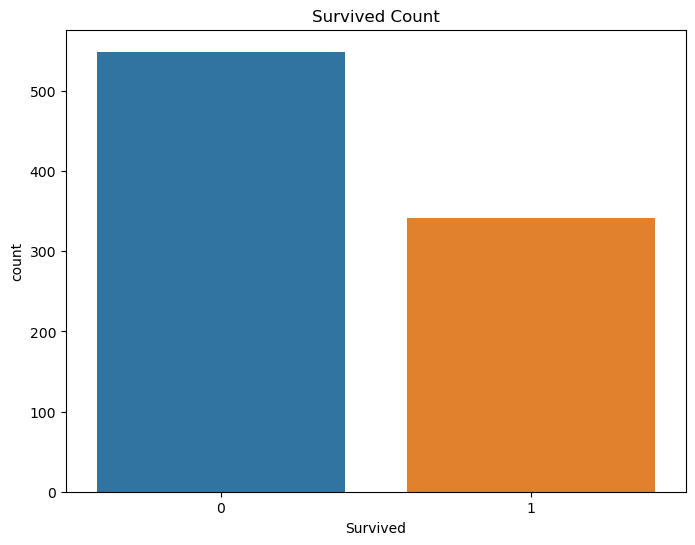

In [12]:
# Survived count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Survived')
plt.title('Survived Count')
plt.show()

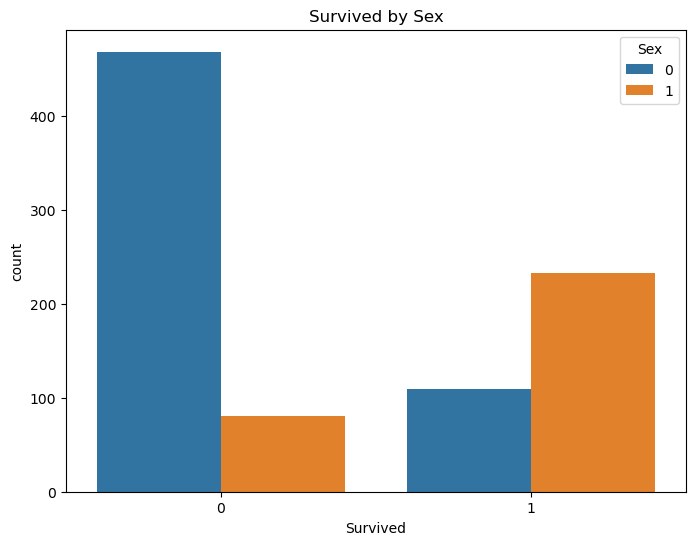

In [13]:
# Survived by Sex
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Survived', hue='Sex')
plt.title('Survived by Sex')
plt.show()

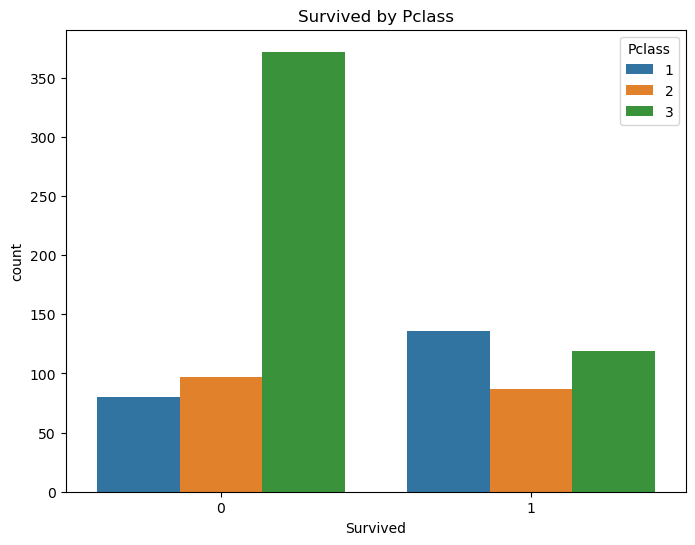

In [14]:
# Survived by Pclass
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Survived', hue='Pclass')
plt.title('Survived by Pclass')
plt.show()

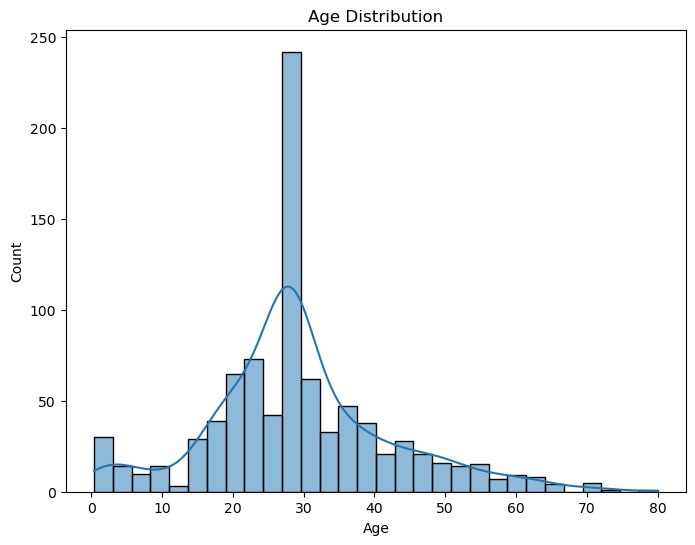

In [15]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x='Age', kde=True)
plt.title('Age Distribution')
plt.show()

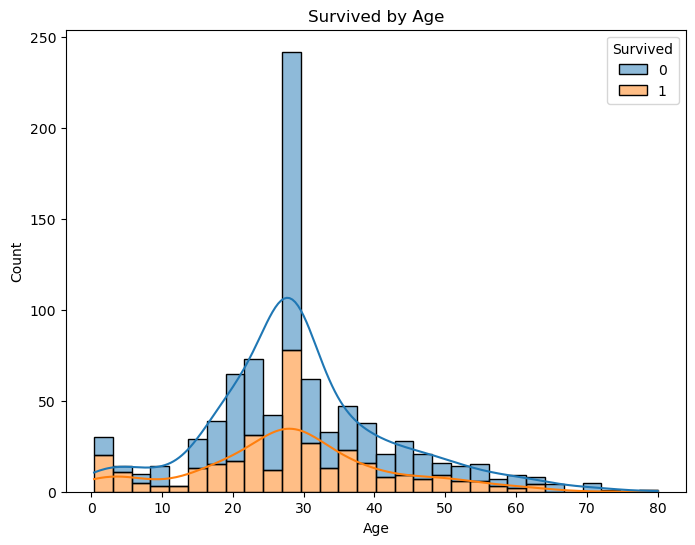

In [16]:
# Survived by Age
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Survived by Age')
plt.show()

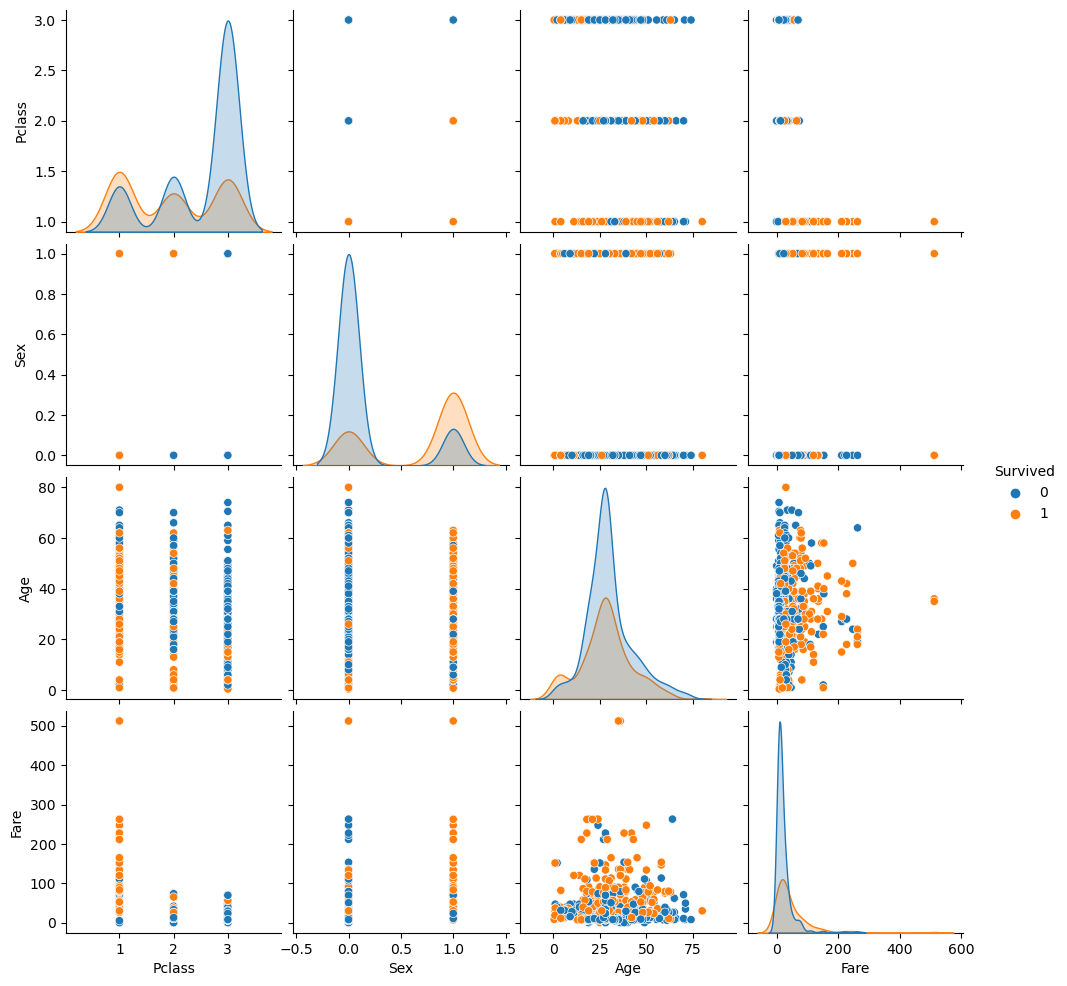

In [18]:
# Pairplot for selected features
sns.pairplot(train_df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']], hue='Survived')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5188\1511272204.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', linewidths=0.2)


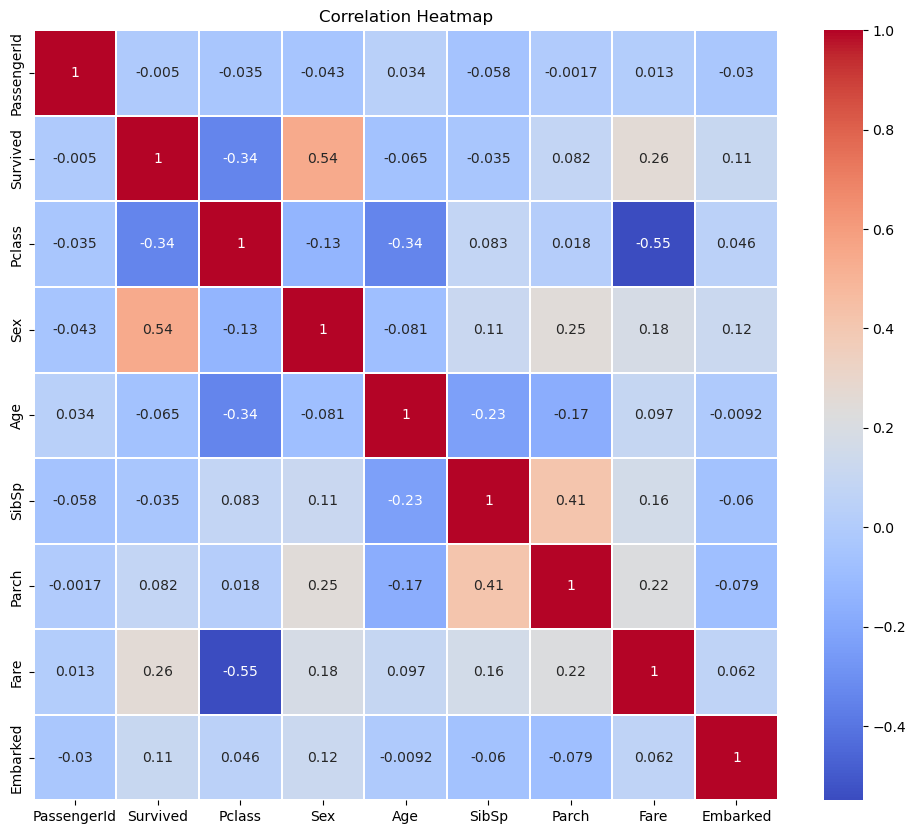

In [19]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Heatmap')
plt.show()